<a href="https://colab.research.google.com/github/Kem98m/Computer-Vision-Sampler/blob/main/homework02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<style>
    @media print{
        body {
            position:relative !important;
        }
        .celltag_new_page {
            page-break-before: always !important;
        }
    }
</style>
# COMPSCI 527 Homework 2

Kenneth Marenco, Pratik Mulpury, Aleksandr Popov

### Problem 0 (3 points)

## Part 1: The Gradient and its Curl

### Problem 1.1 (Exam Style)

$g_x(x, y) = \frac{\delta f(x, y)}{\delta x} = y cos (x) + y^2$

$g_y(x, y) = \frac{\delta f(x, y)}{\delta y} = sin (x) + 2yx - 2y$

### Problem 1.2 (Exam Style)

$\frac{\delta g_x}{\delta y}(x,y) = cos(x) + 2y$

$\frac{\delta g_y}{\delta x}(x,y) = cos(x) + 2y$


<br>

$\frac{\delta g_x}{\delta y}(x,y) - \frac{\delta g_y}{\delta x}(x,y) = cos(x) + 2y - (cos(x) + 2y) = cos(x) - cos(x) + 2y - 2y = 0$

## Part 2: Integrating the Gradient 

### Problem 2.1 (Exam-Style)

$h_x = \begin{bmatrix} -1 & 1\end{bmatrix}$ This will result in an array size of (m, n - 1)

$h_y = \begin{bmatrix} -1 \\ 1\end{bmatrix}$ This will result in an array size of (m - 1, n)

### Problem 2.2 (Exam Style)

$f(0, j) = f(0, 0) + \Sigma_{a = 0}^{j - 1} g_x(0, a)$

$f(i, j) = f(0, j) + \Sigma_{a = 0}^{i - 1} g_y(a, j)$

### Problem 2.3

In [ ]:
import numpy as np
from PIL import Image
from urllib.request import urlretrieve as retrieve
from os import path as osp
from matplotlib import pyplot as plt
%matplotlib inline


def display_signed_image(f):
    bounds = np.percentile(f, (1, 99))
    d = np.minimum(np.maximum(f, bounds[0]), bounds[1]).astype(float)
    max = np.max(np.abs(bounds))
    d = np.round((d + max) / (2. * max) * 255.).astype(np.uint8)
    plt.imshow(d, cmap='gray')
    plt.axis('off')


base_name, gradient_extension = 'eye', 'tif'
gradient_file_names = ['{}_{}.{}'.format(base_name, d, gradient_extension)
                       for d in ('x', 'y')]

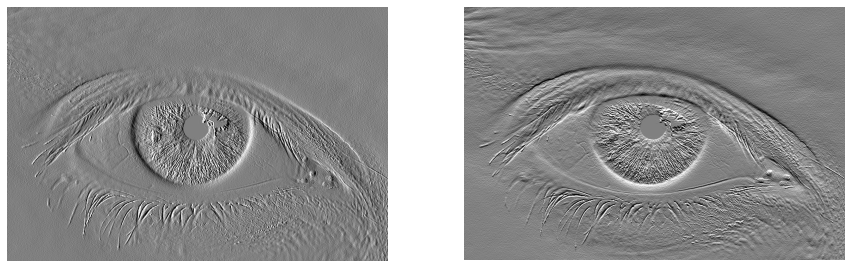

In [ ]:
for name in gradient_file_names:
    if not osp.exists(name):
        image_url = 'https://www2.cs.duke.edu/courses/spring21/' + \
                    'compsci527/homework/2/{}'.format(name)
        retrieve(image_url, name)

gradient = [np.array(Image.open(name)) for name in gradient_file_names]
plt.figure(figsize=(15, 6))
for plot, g in enumerate(gradient):
    plt.subplot(1, 2, plot + 1)
    display_signed_image(g)
plt.show()

f_00 = 164

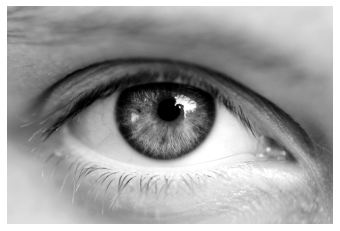

In [ ]:
def integrate(g, first_pixel_value=0):

  top_row = np.hstack((np.array([first_pixel_value]), g[0][0])).reshape(1, -1)
  top_row = np.cumsum(top_row, axis=1)

  final = np.vstack((top_row, g[1]))
  final = np.cumsum(final, axis=0)
  final = np.clip(final, 0, 255).astype(np.uint8)

  display_signed_image(final)

integrate(gradient, f_00)

## Part 3: The Laplacian Operator

### Problem 3.1

$p(x) = \frac{x^2}{2}$

$P(x, y) = \frac{x^2}{4} + \frac{y^2}{4}$

### Problem 3.2

In [ ]:
import scipy.signal as ss


def x_range(sigma):
    k = np.ceil(3. * sigma)
    return np.arange(2 * k + 1) - k


def convolution(f, h, mode='valid'):
    assert f.ndim == h.ndim, 'inputs must have the same number of dimensions'
    g = ss.convolve(f, h, mode=mode, method='direct')
    return g.astype(f.dtype)


def show_plot(p, x=None, figure=True):
    if x is None:
        x = np.arange(len(p))
    if figure:
        plt.figure(figsize=(12, 6))
        plt.subplot()
    ax = plt.gca()
    plt.plot(x, p)
    if figure:
        plt.show()


def compare(fs, xs=None, show=show_plot):
    if xs is None:
        xs = [np.arange(len(f)) for f in fs]
    else:
        assert len(fs) == len(xs), 'inconsistent lists of ordinates and abscissas'
    n = len(fs)
    width = 12
    fig = plt.figure(figsize=(width, width / n))
    for plot, (x, y) in enumerate(zip(xs, fs)):
        if show.__name__ == 'show_mesh':
            fig.add_subplot(1, n, plot + 1, projection='3d')
        else:
            fig.add_subplot(1, n, plot + 1)
        show(y, x=x, figure=False)
    plt.show()



sigma = 3.5
tail, samples = 4 * sigma, 101
fine_x = np.linspace(-tail, tail, samples)

In [ ]:
def normalized(kernel, probe):
  constant = convolution(probe, kernel)
  normalized_kernel = kernel / constant.item(0)

  return normalized_kernel


def gaussian(sigma, x=None):

  if x is None:
    x = x_range(sigma)
    top = x ** 2
    kernel = - (top) / (2 * (sigma**2))
    kernel = np.exp(kernel)

    probe = np.full(kernel.shape, (x**2) / 2)
    kernel = normalized(kernel, probe)

    return kernel, x

  top = x ** 2
  top *= -1
  values = (top) / (2 * (sigma**2))
    
  return values

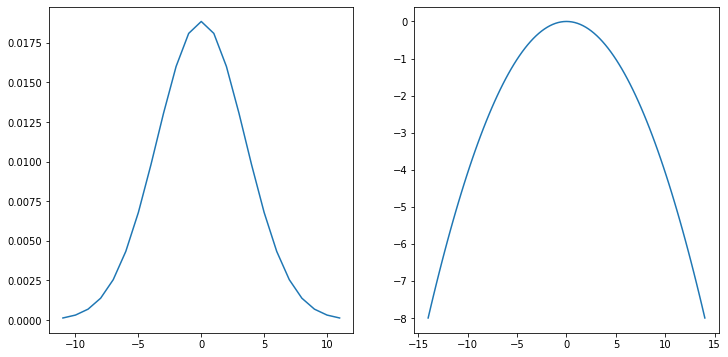

In [ ]:
gauss, kernel_x = gaussian(sigma)
fine_gauss = gaussian(sigma, fine_x)
compare((gauss, fine_gauss), xs=(kernel_x, fine_x))

### Problem 3.3 (Exam Style)

$\frac{d g(x)}{d x} = \frac{d e^{-\frac{x^2}{2 \sigma^2}}}{d x} \frac{d - \frac{x^2}{2 \sigma^2}}{d x}$

$= (- \frac{x}{\sigma^2})e^{- \frac{x^2}{2 \sigma^2}} = (- \frac{x}{\sigma^2}) g(x)$

$\nabla^2 g(x) = \frac{d^2 g(x)}{d x^2} = \frac{d (- \frac{x}{\sigma^2}) g(x)}{d x}$

$= (\frac{d (- \frac{x}{\sigma^2})}{d x} g(x)) + ((- \frac{x}{\sigma^2})\frac{d g(x)}{d x})$

$= (- \frac{1}{\sigma^2} g(x)) + ((- \frac{x}{\sigma^2}) (- \frac{x}{\sigma^2}) g(x))$

$= - \frac{1}{\sigma^2} g(x) + \frac{x^2}{\sigma^4} g(x)$

$= g(x)(\frac{-1}{\sigma^2} + \frac{x^2}{\sigma^4})$

$\frac{\delta G(x, y)}{\delta x} = \frac{\delta e^{-\frac{x^2 + y^2}{2 \sigma^2}}}{\delta x} \frac{\delta - \frac{x^2 + y^2}{2 \sigma^2}}{\delta x}$

$= (- \frac{x}{\sigma^2})e^{-\frac{x^2 + y^2}{2 \sigma^2}} = (- \frac{x}{\sigma^2}) G(x, y)$


$\frac{\delta^2 G(x, y)}{\delta x} = \frac{\delta (- \frac{x}{\sigma^2}) G(x, y)}{\delta x}$

$= (\frac{\delta (- \frac{x}{\sigma^2})}{\delta x} G(x, y)) + ((- \frac{x}{\sigma^2})\frac{\delta G(x, y)}{\delta x})$

$= (- \frac{1}{\sigma^2} G(x, y)) + ((- \frac{x}{\sigma^2}) (- \frac{x}{\sigma^2}) G(x, y))$

$= - \frac{1}{\sigma^2} G(x, y) + \frac{x^2}{\sigma^4} G(x, y)$

$= G(x, y)(\frac{-1}{\sigma^2} + \frac{x^2}{\sigma^4})$

<br>

$\frac{\delta^2 G(x, y)}{\delta y} = G(x, y)(\frac{-1}{\sigma^2} + \frac{y^2}{\sigma^4})$

$\nabla^2 G(x, y) = \frac{\delta^2 G(x, y)}{\delta x} + \frac{\delta^2 G(x, y)}{\delta y}$ 

$ = G(x, y)(\frac{-1}{\sigma^2} + \frac{x^2}{\sigma^4}) + G(x, y)(\frac{-1}{\sigma^2} + \frac{y^2}{\sigma^4})$

$= G(x, y)(\frac{-2}{\sigma^2} + \frac{x^2}{\sigma^4} + \frac{y^2}{\sigma^4})$

### Problem 3.4


[//]: # (Rewrite the expressions here.)
$\ell(x) = g(x)(\frac{-1}{\sigma^2} + \frac{x^2}{\sigma^4})$ 

$L(x, y) = G(x, y)(\frac{-2}{\sigma^2} + \frac{x^2}{\sigma^4} + \frac{y^2}{\sigma^4})$

$p(x) = \frac{x^2}{2}$

$P(x, y) = \frac{x^2}{4} + \frac{y^2}{4}$

In [ ]:
def show_mesh(f, x=None, figure=True):
    assert f.shape[0] == f.shape[1], 'implemented only for square meshes'
    if x is None:
        x = np.arange(f.shape[0])
    xs, ys = np.meshgrid(x, x)
    if figure:
        plt.figure()
        plt.axes(projection='3d')
    ax = plt.gca()
    ax.plot_wireframe(xs, ys, f, color='gray', linewidths=0.5)
    if figure:
        plt.show()

In [ ]:
def log(sigma, dim=1, x=None):
  assert dim == 1 or dim == 2, 'only implemented for d==1 or d==2'

  if dim == 1:
    if x is None:
      x = x_range(sigma)

      return gaussian(sigma, x) * ((-1 / sigma**2) + (x**2 / sigma ** 4)), x

    else:
      return gaussian(sigma, x) * ((-1 / sigma**2) + (x**2 / sigma ** 4))

  if x is None:
    x_orig = x_range(sigma)
    x = np.outer(x_orig, x_orig)

    return gaussian(sigma, x) * ((-2 / sigma**2) + ((2 * x**2) / sigma ** 4)), x_orig

  else:
    x = np.outer(x, x)
    return gaussian(sigma, x) * ((-2 / sigma**2) + ((2 * x**2) / sigma ** 4))

  

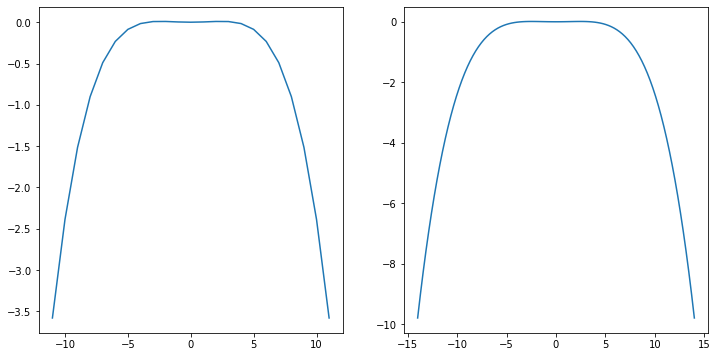

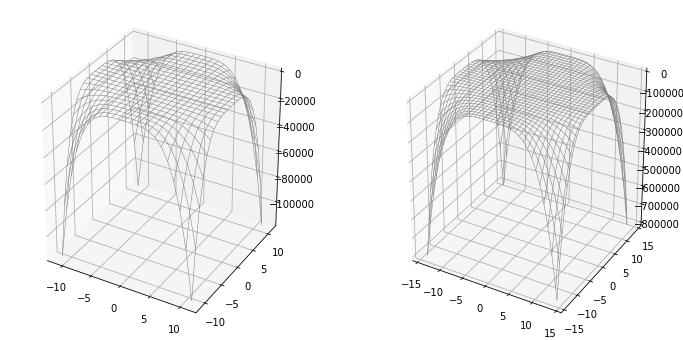

In [ ]:
laplace_kernel_1d, kernel_x = log(sigma)
laplace_1d = log(sigma, x=fine_x)
compare((laplace_kernel_1d, laplace_1d), xs=(kernel_x, fine_x))

laplace_kernel_2d, kernel_x = log(sigma, dim=2)
laplace_2d = log(sigma, x=fine_x, dim=2)
compare((laplace_kernel_2d, laplace_2d), xs=(kernel_x, fine_x), show=show_mesh)

## Part 4: A Simple Edge Detection Method

### Problem 4.1 (Exam Style)

If the noise is too large, it can be perceived after the operator as a big swing seen when searching for zero-crossings. It may also blur the significance of the big swing that is actually being searched which means it would be harder to detect the edges.

### Problem 4.2

I will be using the laplacian kernel provided in the .pkl file.

In [ ]:
david_name = 'david.png'
if not osp.exists(david_name):
    david_url = 'https://www2.cs.duke.edu/courses/spring21/' + \
                    'compsci527/homework/2/{}'.format(david_name)
    retrieve(david_url, david_name)
image = np.array(Image.open(david_name)).astype(float) / 255.


def show_image(img, width=6., figure=True):
    if figure:
        aspect = img.shape[0] / img.shape[1]
        height = width * aspect
        plt.figure(figsize=(width, height))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    if figure:
        plt.show()

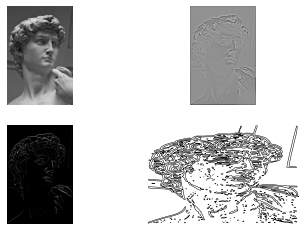

In [ ]:
import pickle

laplacian_file = 'laplacian.pkl'
with open(laplacian_file, 'rb') as file:
  laplace_kernel_2d = pickle.load(file)

log_image = convolution(image, laplace_kernel_2d, mode='same')
threshholded = np.clip(log_image, 0, 1)


plt.subplot(2, 2, 1)
show_image(image, figure=False)
plt.subplot(2, 2, 2)
show_image(log_image, figure=False)
plt.subplot(2, 2, 3)
show_image(threshholded, figure=False)


fig = plt.subplot(2, 2, 4)
plt.contour(log_image, [0.], origin='image', colors='black',
   linewidths=0.5)
width = 6
aspect = image.shape[0] / image.shape[1]
height = width * aspect

fig.width = 3
fig.heigh = height
plt.axis('off')

plt.show()


### Problem 4.3 (Exam Style)

The contour plot outlines all the areas in the LoG output where there are zero crossings. In the threshholded image, all of the highlighted edges are surrounded on all sides by 0 values, meaning the LoG values swing back and forth (as seen in the right plot at the start of question 4). Because of this, contour plot will capture this as closed curves. The only excpetion to this is at the edges of images.

### Problem 4.4 (Exam Style)

A problem in that part of the image are that as the LoG moves across that region of the image, the edges running in different directions cancel each other. Since LoG is computed by adding the second order partial derivatives in the X and Y directions, the resulting edge detection may fail in that region if the partial derivatives are opposing the the X and Y direction.

A fix may be to run a sharpening filter over the image in order to better highlight the edges and allow of the LoG to better distinguish between the unclear edges that run in alternating directions.

